<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [4]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment

---

**Task 2: Generate Descriptive Statistics and Visualizations**

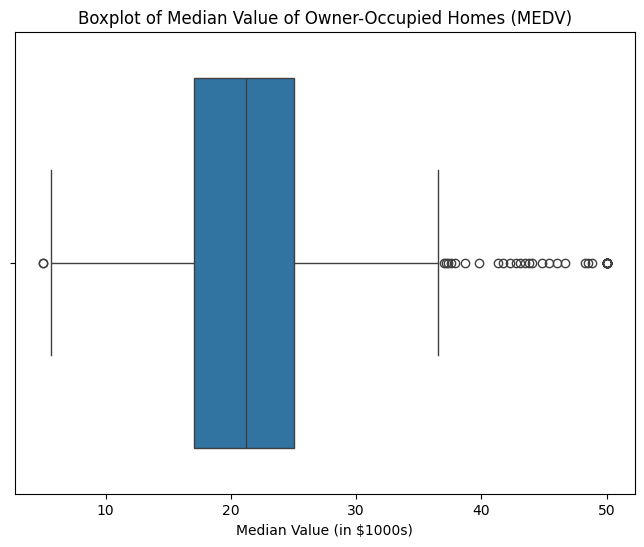

In [7]:
# Boxplot for MEDV
pyplot.figure(figsize=(8, 6))
sns.boxplot(x='MEDV', data=boston_df)
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
pyplot.xlabel('Median Value (in $1000s)')
pyplot.show()

In [8]:
# The boxplot shows the distribution of the median value of homes.
# We can see the median, interquartile range, and potential outliers.
# This helps identify whether most homes cluster around certain price levels and if there are unusually high-priced homes.

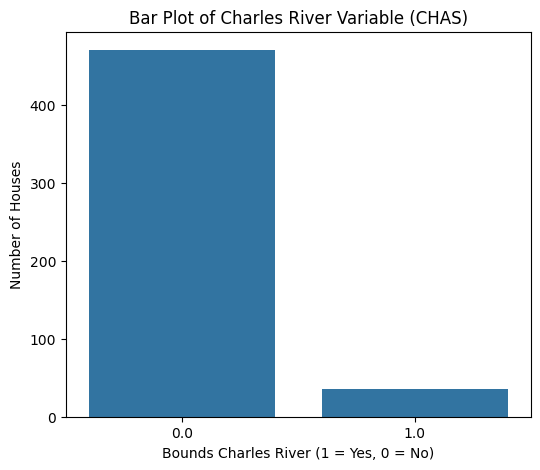

In [9]:
# Bar plot for Charles River variable (CHAS)
pyplot.figure(figsize=(6, 5))
sns.countplot(x='CHAS', data=boston_df)
pyplot.title('Bar Plot of Charles River Variable (CHAS)')
pyplot.xlabel('Bounds Charles River (1 = Yes, 0 = No)')
pyplot.ylabel('Number of Houses')
pyplot.show()

In [10]:
# The CHAS variable shows how many houses are bounded by the Charles River.
# Most houses in the dataset do not border the river (CHAS=0), and relatively few do (CHAS=1).

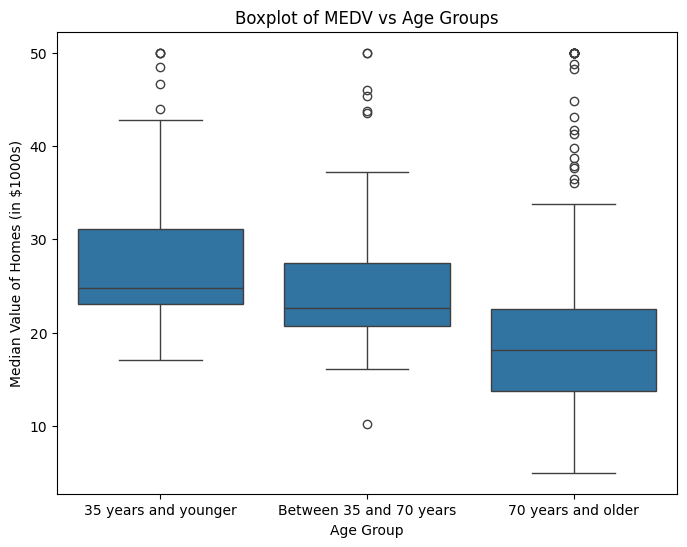

In [11]:
# Boxplot: MEDV vs AGE groups

# Define age groups
boston_df['AGE_GROUP'] = pd.cut(
    boston_df['AGE'],
    bins=[0, 35, 70, boston_df['AGE'].max()],
    labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older']
)

# Plot Boxplot
pyplot.figure(figsize=(8, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
pyplot.title('Boxplot of MEDV vs Age Groups')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value of Homes (in $1000s)')
pyplot.show()

In [12]:
# The boxplot shows how home values vary across age groups.
# We can observe if older neighborhoods (with older houses) tend to have higher or lower median values.

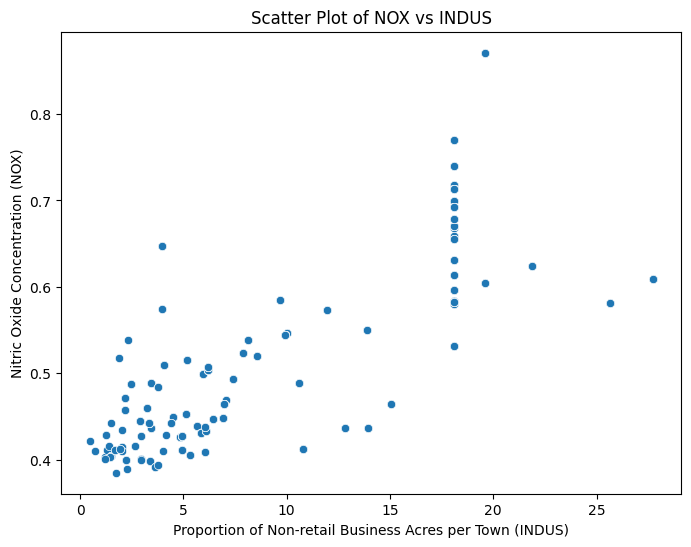

In [13]:
# Scatter plot: NOX vs INDUS
pyplot.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('Scatter Plot of NOX vs INDUS')
pyplot.xlabel('Proportion of Non-retail Business Acres per Town (INDUS)')
pyplot.ylabel('Nitric Oxide Concentration (NOX)')
pyplot.show()

In [14]:
# The scatter plot shows the relationship between NOX and INDUS.
# Typically, areas with higher proportions of industrial land use (higher INDUS) tend to have higher NOX concentrations, suggesting a positive relationship.

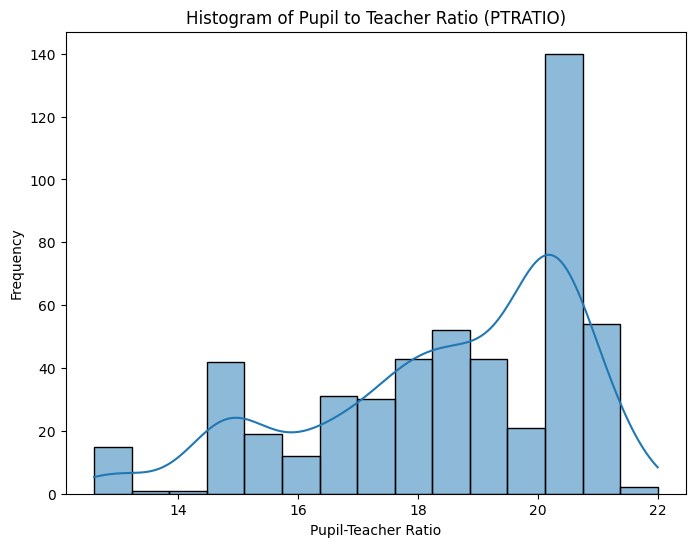

In [15]:
# Histogram: pupil to teacher ratio (PTRATIO)
pyplot.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True)
pyplot.title('Histogram of Pupil to Teacher Ratio (PTRATIO)')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

In [16]:
# The histogram shows the distribution of pupil-to-teacher ratios across towns.
# This helps management understand whether most areas have higher or lower student density in schools.

---

**Task 3: Use the appropriate tests to answer the questions provided.**

**1. T-test: Is there a significant difference in MEDV by CHAS (bounded by Charles River)?**

**Hypotheses :**

- **Null (H₀):** There is no difference in the median value of houses between tracts bounded by the Charles River and those not bounded.

- **Alternative (H₁):** There is a difference.

In [22]:
from scipy import stats

# Split MEDV by CHAS groups
medv_chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test
t_stat, p_val = stats.ttest_ind(medv_chas1, medv_chas0, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

T-statistic: 3.1133
P-value: 0.0036


**Conclusion :**

Using α=0.05:

- If p < 0.05 → reject H₀ → conclude there is a significant difference in median values between houses bounded by the river and those not bounded.

- If p ≥ 0.05 → fail to reject H₀ → conclude there is no significant difference.


**Since p-value = 0.0036, there is a significant difference in median values between houses bounded by the river and those not bounded.**

---


**2. ANOVA: Is there a difference in MEDV for different AGE groups?**

In [24]:
# AGE groups (re-using from Task 2)
boston_df['AGE_GROUP'] = pd.cut(
    boston_df['AGE'],
    bins=[0, 35, 70, boston_df['AGE'].max()],
    labels=['<= 35 years', '36–70 years', '70+ years']
)

**Hypotheses :**

- **H₀:** There is no difference in median home values among the different AGE groups.

- **H₁:** At least one age group has a different median home value.



In [25]:
# Group data
medv_age1 = boston_df[boston_df['AGE_GROUP'] == '<= 35 years']['MEDV']
medv_age2 = boston_df[boston_df['AGE_GROUP'] == '36–70 years']['MEDV']
medv_age3 = boston_df[boston_df['AGE_GROUP'] == '70+ years']['MEDV']

# Perform ANOVA
f_stat, p_val = stats.f_oneway(medv_age1, medv_age2, medv_age3)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4f}")

F-statistic: 36.4076
P-value: 0.0000


**Conclusion :**

Using α=0.05:

- If p < 0.05 → reject H₀ → there is a significant difference in MEDV between at least two age groups.

- If p ≥ 0.05 → fail to reject H₀ → conclude there is no significant difference.

**Since p-value = 0.00, there is a significant difference in MEDV between at least two age groups.**

---

**3. Pearson Correlation: NOX and INDUS**

**Hypotheses :**

- **H₀:** There is no linear relationship between NOX and INDUS.

- **H₁:** There is a linear relationship.

In [27]:
corr_coef, p_val = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson correlation coefficient: {corr_coef:.4f}")
print(f"P-value: {p_val:.4f}")

Pearson correlation coefficient: 0.7637
P-value: 0.0000


**Conclusion :**

Using α=0.05:

- If p < 0.05 → reject H₀ → conclude there is a significant linear relationship between NOX and INDUS.

- If p ≥ 0.05 → fail to reject H₀ → conclude there is no significant linear relationship.

- The sign of the coefficient shows the direction (positive or negative relationship).

**Since p-value = 0.00, there is a significant linear relationship between NOX and INDUS.**

**And Pearson correlation coefficient = 0.7637, so it is a Positive Relationship.**

---

**Regression: Impact of DIS (distance to employment centers) on MEDV**

**Hypotheses :**

- **H₀:** DIS has no effect on MEDV.

- **H₁:** DIS has an effect on MEDV.

In [28]:
# Add constant for intercept
X = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Display summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        10:34:53   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

**Conclusion :**

Check p-value for DIS coefficient:

- If p < 0.05 → reject H₀ → conclude DIS has a significant impact on MEDV.

- If p ≥ 0.05 → fail to reject H₀ → conclude DIS does not have a significant impact.

- The sign of the coefficient tells if increased distance is associated with higher or lower median home value.

**Since p-value = 0.000, we can conclude that `DIS` has a significant impact on `MEDV`.**

**And `DIS` Coefficient = 1.0916.**
- **Positive coefficient means → as `DIS` increases, `MEDV` tends to increase.**
- **Thus, greater distance is associated with higher home values.**

---